**Use WordNet to identify semantic relationships such as synonymy, antonymy, and hypernymy
in text data**


**Environment Setup**

This cell imports the NLTK library and downloads the WordNet database. WordNet is a lexical database that groups English words into sets of synonyms called synsets.

In [1]:
import nltk
from nltk.corpus import wordnet as wn

# Download the necessary WordNet data packages
nltk.download('wordnet')
nltk.download('omw-1.4')

print("WordNet environment is ready.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


WordNet environment is ready.


**Extracting Synonyms and Antonyms**

Synonyms are retrieved from the lemmas of a synset, representing word forms with the same meaning. Antonyms are also found at the lemma level because "opposites" are specific to words (e.g., "heavy" vs "light") rather than abstract concepts.

In [2]:
# Theory: We use sets to prevent duplicate word forms across different meanings.
# Lemma antonyms are checked because not every word sense has a direct opposite.

def get_syn_ant(word):
    synonyms = set()
    antonyms = set()

    for syn in wn.synsets(word):
        for l in syn.lemmas():
            synonyms.add(l.name().replace('_', ' '))
            if l.antonyms():
                antonyms.add(l.antonyms()[0].name().replace('_', ' '))

    return sorted(list(synonyms)), sorted(list(antonyms))

word = "increase"
syns, ants = get_syn_ant(word)
print(f"Word: {word}\nSynonyms: {syns}\nAntonyms: {ants}")

Word: increase
Synonyms: ['addition', 'gain', 'growth', 'increase', 'increment', 'step-up']
Antonyms: ['decrease', 'decrement']


**Identifying Hypernyms**

Hypernymy represents a "kind-of" relationship (e.g., a "Car" is a kind of "Vehicle"). It allows the computer to understand the taxonomic rank and general category of a specific word.

In [3]:
# Theory: Hypernyms move 'up' the tree to find more general categories.
# This code extracts the name of the parent category for all senses of the word.

def get_hypernyms(word):
    hypernyms = set()
    for syn in wn.synsets(word):
        for h in syn.hypernyms():
            hypernyms.add(h.name().split('.')[0].replace('_', ' '))
    return sorted(list(hypernyms))

target_word = "lion"
print(f"Hypernyms (Categories) of '{target_word}': {get_hypernyms(target_word)}")

Hypernyms (Categories) of 'lion': ['big cat', 'celebrity', 'person']


**Semantic Similarity Scoring**

This calculates how related two words are based on their distance in the WordNet tree. The Wu-Palmer Similarity ($WUP$) is a specific formula that scores similarity between 0 and 1 based on the depth of the words and their common ancestor.

In [4]:
# Theory: We compare the first synset (most common meaning) of each word.
# A score of 1.0 means identical concepts, while scores near 0.0 mean no relation.

def get_similarity(w1, w2):
    s1 = wn.synsets(w1)
    s2 = wn.synsets(w2)

    if s1 and s2:
        # Calculate Wu-Palmer Similarity
        score = s1[0].wup_similarity(s2[0])
        return round(score, 4) if score else 0
    return "Word not found"

# Test cases
pairs = [("cat", "dog"), ("bicycle", "car"), ("apple", "justice")]
for p1, p2 in pairs:
    print(f"Similarity between {p1} and {p2}: {get_similarity(p1, p2)}")

Similarity between cat and dog: 0.8571
Similarity between bicycle and car: 0.7273
Similarity between apple and justice: 0.1333


**Optimized Summary Table**

This final cell combines all logic into a single function to process text data efficiently. It outputs a structured summary of the word's semantic profile.

In [5]:
# Theory: Efficiently gathers all WordNet relations in a single loop.
# This is the 'Optimized' approach for processing lists of words in NLP tasks.

def word_analyzer(word):
    syns = set()
    ants = set()
    hypers = set()

    for syn in wn.synsets(word):
        for l in syn.lemmas():
            syns.add(l.name())
            if l.antonyms(): ants.add(l.antonyms()[0].name())
        for h in syn.hypernyms():
            hypers.add(h.name().split('.')[0])

    print(f"--- Analysis for '{word}' ---")
    print(f"Synonyms: {list(syns)[:5]}")
    print(f"Antonyms: {list(ants)[:5]}")
    print(f"Hypernyms: {list(hypers)[:5]}\n")

# Run analysis
test_words = ["large", "computer"]
for w in test_words:
    word_analyzer(w)

--- Analysis for 'large' ---
Synonyms: ['expectant', 'gravid', 'enceinte', 'bombastic', 'with_child']
Antonyms: ['small', 'little']
Hypernyms: ['size']

--- Analysis for 'computer' ---
Synonyms: ['computing_device', 'information_processing_system', 'estimator', 'figurer', 'computer']
Antonyms: []
Hypernyms: ['machine', 'expert']



**Visualization of Semantic Relationships**



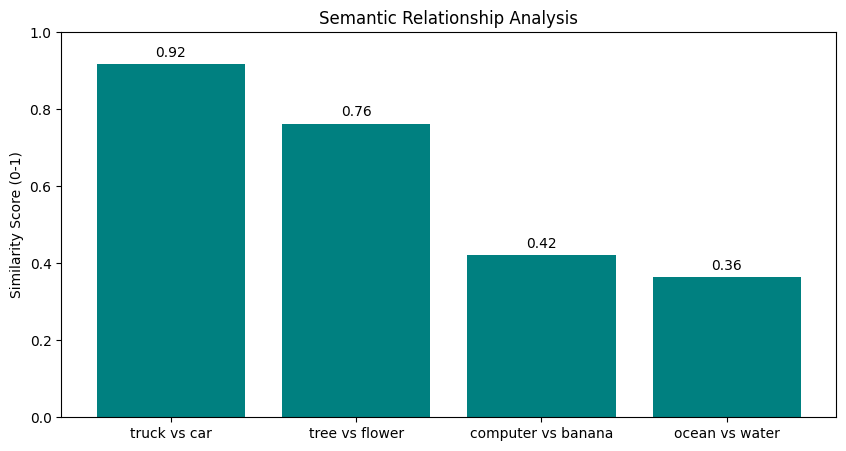

In [8]:
import matplotlib.pyplot as plt

# 1. Define the word pairs to compare
word_pairs = [("truck", "car"), ("tree", "flower"), ("computer", "banana"), ("ocean", "water")]

# 2. Calculate Similarity Matrix (Logic from Cell 4)
scores = {}
for w1, w2 in word_pairs:
    syn1, syn2 = wn.synsets(w1), wn.synsets(w2)
    if syn1 and syn2:
        score = syn1[0].wup_similarity(syn2[0])
        scores[f"{w1} vs {w2}"] = score if score else 0

# 3. Visualization Logic (Logic from Cell 5)
if scores:
    # Sort scores for a cleaner chart
    sorted_data = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(10, 5))
    bars = plt.bar(sorted_data.keys(), sorted_data.values(), color='teal')

    # Formatting
    plt.ylabel('Similarity Score (0-1)')
    plt.title('Semantic Relationship Analysis')
    plt.ylim(0, 1.0)

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center')

    plt.show()
else:
    print("Error: No scores were calculated. Check if words exist in WordNet.")